### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


### Дисциплина: Методы машинного обучения

##### Студент:  Мерич Дорук Каймакджыоглу
##### Группа: НКНбд-01-20

## Москва 2023
***

### Вариант № 20

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки. Оставьте в обучающей и тестовой выборках диапазон классов, указанных в индивидуальном задании. Если изображения цветные (с тремя каналами), то перекодируйте их в одноцветные (оттенки серого).

In [1]:
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
import random
from PIL import Image, ImageOps
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
data = 'symmetric_solids'
ds = tfds.load(data, split=['train[:1%]', 'train[1%:2%]'], try_gcs=False)
df_train = tfds.as_dataframe(ds[0])
df_test = tfds.as_dataframe(ds[1])
n = df_train.iloc[0]['image'].shape[0]
a = 4
b = 5
c = 6
epochs = 20

df_train1 = []
for i in df_train.values:
    if i[1] in (a, b, c):
        df_train1.append(i)
df_train = pd.DataFrame(df_train1)
df_test1 = []

for i in df_test.values:
    if i[1] in (a, b, c):
        df_test1.append(i)
df_test = pd.DataFrame(df_test1)

train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)

k = np.unique(train_labels)[0]
train_labels = np.array([x - k for x in train_labels])
test_labels = np.array([x - k for x in test_labels])

print(np.unique(train_labels))

train_images = np.zeros(shape=(df_train.shape[0], n, n, 3), dtype=np.float32)
test_images = np.zeros(shape=(df_test.shape[0], n, n, 3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))

input_train = train_images/255
input_test = train_images/255

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=5)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=5)

[0. 1. 2.]


In [3]:
mnist_x_train = np.dot(input_train[...,:3], [0.2989, 0.5870, 0.1140])
mnist_x_test = np.dot(input_test[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
input_train.shape

(1333, 224, 224, 3)

2. Создайте и обучите на обучающей выборке автокодировщик архитектуры, указанной в индивидуальном задании. Визуализируйте несколько исходных и восстановленных автокодировщиком изображений. 

In [5]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
from keras import regularizers

encoding_dim = 16

input_img = Input(shape=(n*n,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(n*n, activation='sigmoid')(decoded)
autoencoderCNN = Model(input_img, decoded)

autoencoderCNN.compile(optimizer='adam', loss='mean_absolute_percentage_error')
input_train.shape, input_test.shape

((1333, 224, 224, 3), (1333, 224, 224, 3))

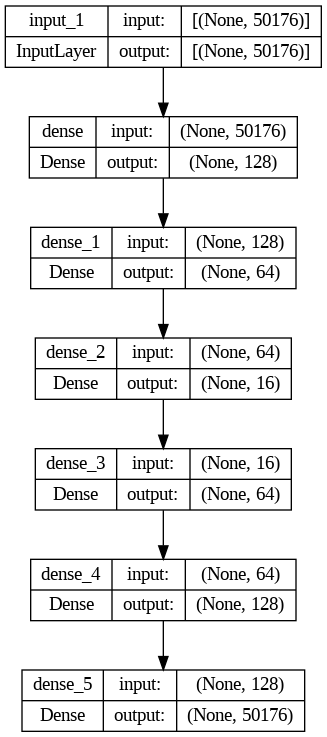

In [6]:
keras.utils.plot_model(autoencoderCNN, show_shapes = True)

In [7]:

mnist_x_trainMLP = mnist_x_train.reshape(
    (len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))
mnist_x_testMLP  = mnist_x_test.reshape(
    (len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))
mnist_x_trainMLP.shape, mnist_x_testMLP.shape

((1333, 50176), (1333, 50176))

In [8]:
autoencoderCNN.compile(optimizer='adam', loss='mean_absolute_percentage_error')

history = autoencoderCNN.fit(mnist_x_trainMLP, mnist_x_trainMLP,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_testMLP, mnist_x_testMLP),
                verbose = 1);

Epoch 1/10
6/6 [==============================] - 9s 403ms/step - loss: 225157728.0000 - val_loss: 3471534.7500
Epoch 2/10
6/6 [==============================] - 1s 133ms/step - loss: 869145.0625 - val_loss: 2011.8402
Epoch 3/10
6/6 [==============================] - 1s 133ms/step - loss: 832.6566 - val_loss: 24.0486
Epoch 4/10
6/6 [==============================] - 1s 136ms/step - loss: 21.7228 - val_loss: 19.7993
Epoch 5/10
6/6 [==============================] - 1s 133ms/step - loss: 19.7750 - val_loss: 19.7744
Epoch 6/10
6/6 [==============================] - 1s 131ms/step - loss: 19.7601 - val_loss: 19.7583
Epoch 7/10
6/6 [==============================] - 1s 134ms/step - loss: 19.7544 - val_loss: 19.7573
Epoch 8/10
6/6 [==============================] - 1s 187ms/step - loss: 19.7511 - val_loss: 19.7493
Epoch 9/10
6/6 [==============================] - 1s 202ms/step - loss: 19.7470 - val_loss: 19.7481
Epoch 10/10
6/6 [==============================] - 1s 188ms/step - loss: 19.7483 

42/42 [==============================] - 0s 4ms/step


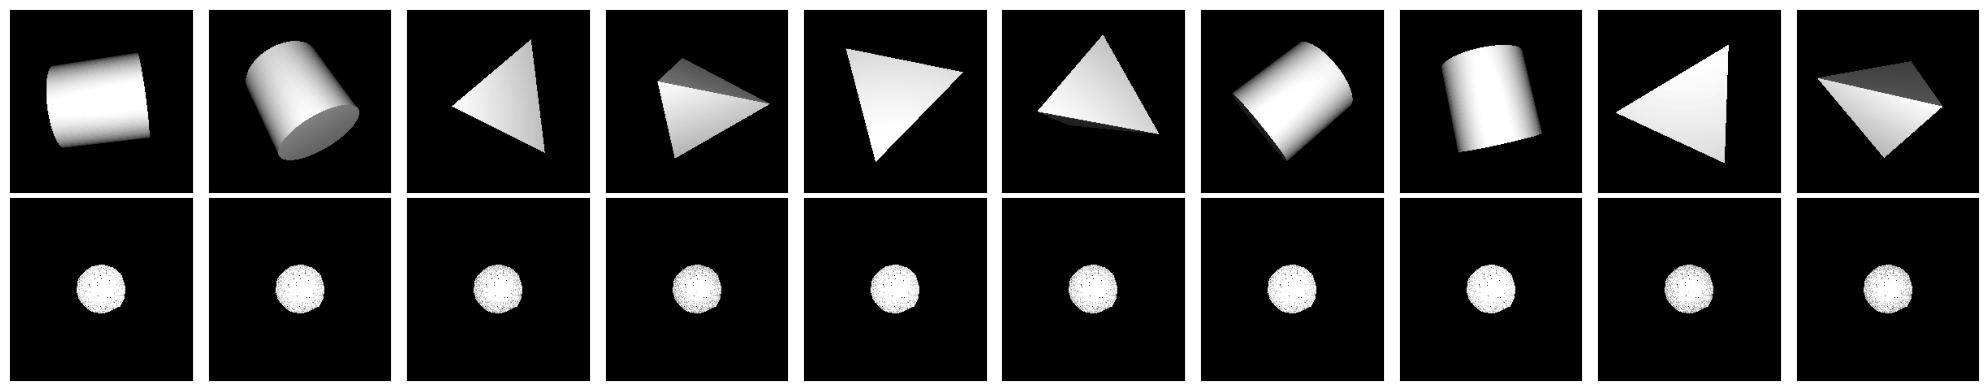

In [9]:
decoded_imgs = autoencoderCNN.predict(mnist_x_trainMLP)
import matplotlib.pyplot as plt

def image_show(orig_imgs, dec_imgs, fname=None):
    l = 10  # кол-во изображений
    fig = plt.figure(figsize=(20, 4))
    for i in range(l):
        # исходные изображения
        ax = plt.subplot(2, l, i + 1)
        plt.imshow(orig_imgs[i].reshape(n, n))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # реконструированные изображения
        ax = plt.subplot(2, l, i + 1 + l)
        plt.imshow(dec_imgs[i].reshape(n, n))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

    if fname:
        fig.savefig(fname)   

image_show(mnist_x_trainMLP, decoded_imgs) 

3. Оцените качество модели автокодировщика на тестовой выборке по показателю, указанному в индивидуальном задании.

# Качество = val_loss of model

In [10]:
autoencoderCNN.loss

'mean_absolute_percentage_error'

In [11]:
val_loss = history.history['val_loss']
print('Test Loss:', val_loss[-1])

Test Loss: 19.742116928100586


4. Оставьте в наборах изображения первых двух классов диапазона, указанного в индивидуальном задании первыми. Визуализируйте набор данных на плоскости, соответствующей двум первым латентным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

In [25]:
df_train1 = []
for i in df_train.values:
    if i[1] in (a, b):
        df_train1.append(i)
df_train = pd.DataFrame(df_train1)
df_test1 = []

for i in df_test.values:
    if i[1] in (a, b):
        df_test1.append(i)
df_test = pd.DataFrame(df_test1)

train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)

k = np.unique(train_labels)[0]
train_labels = np.array([x - k for x in train_labels])
test_labels = np.array([x - k for x in test_labels])

print(np.unique(train_labels))

train_images = np.zeros(shape=(df_train.shape[0], n, n, 3), dtype=np.float32)
test_images = np.zeros(shape=(df_test.shape[0], n, n, 3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))

input_train = train_images/255
input_test = test_images/255

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=5)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=5)

[0. 1.]


In [26]:
input_test.shape, test_images.shape

((916, 224, 224, 3), (916, 224, 224, 3))

In [27]:
mnist_x_train = np.dot(input_train[...,:3], [0.2989, 0.5870, 0.1140])
mnist_x_test = np.dot(input_test[...,:3], [0.2989, 0.5870, 0.1140])

mnist_x_trainMLP = mnist_x_train.reshape(
    (len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))

mnist_x_testMLP  = mnist_x_test.reshape(
    (len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))

mnist_x_trainMLP.shape, mnist_x_testMLP.shape

((876, 50176), (916, 50176))

In [28]:
# Объединяем обучающий и тестовый наборы данных
all_images = np.concatenate((train_images, test_images), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

In [29]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(n*n,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(n*n, activation='sigmoid')(decoded)
autoencoderCNN = Model(input_img, decoded)

# Создание автокодировщика
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Обучение автокодировщика
autoencoder.fit(mnist_x_trainMLP, mnist_x_trainMLP,
                epochs=epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_testMLP, mnist_x_testMLP))

# Извлечение латентных признаков
encoder = Model(input_img, encoded)
latent_features = encoder.predict(mnist_x_testMLP)

Epoch 1/20
4/4 [==============================] - 4s 434ms/step - loss: 0.2119 - val_loss: 0.1578
Epoch 2/20
4/4 [==============================] - 0s 138ms/step - loss: 0.0970 - val_loss: 0.0419
Epoch 3/20
4/4 [==============================] - 1s 151ms/step - loss: 0.0406 - val_loss: 0.0403
Epoch 4/20
4/4 [==============================] - 0s 140ms/step - loss: 0.0393 - val_loss: 0.0394
Epoch 5/20
4/4 [==============================] - 0s 139ms/step - loss: 0.0384 - val_loss: 0.0384
Epoch 6/20
4/4 [==============================] - 0s 145ms/step - loss: 0.0374 - val_loss: 0.0375
Epoch 7/20
4/4 [==============================] - 0s 144ms/step - loss: 0.0363 - val_loss: 0.0366
Epoch 8/20
4/4 [==============================] - 0s 142ms/step - loss: 0.0355 - val_loss: 0.0357
Epoch 9/20
4/4 [==============================] - 1s 144ms/step - loss: 0.0346 - val_loss: 0.0347
Epoch 10/20
4/4 [==============================] - 0s 146ms/step - loss: 0.0338 - val_loss: 0.0340
Epoch 11/20
4/4 [==

In [30]:
mnist_x_testMLP.shape,test_labels.shape

((916, 50176), (916, 5))

29/29 [==============================] - 0s 4ms/step


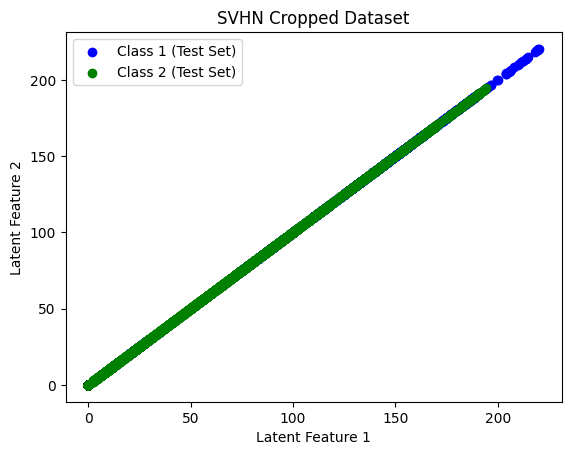

In [31]:
# Encode the test images
encoded_images = encoder.predict(mnist_x_testMLP)

# Extract the latent features for each class
test_latent_class1 = encoded_images[np.where(test_labels[:, 0] == 1)]
test_latent_class2 = encoded_images[np.where(test_labels[:, 1] == 1)]

# Plot the latent features
plt.scatter(test_latent_class1, test_latent_class1, c='b', label='Class 1 (Test Set)')
plt.scatter(test_latent_class2, test_latent_class2, c='g', label='Class 2 (Test Set)')

plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.title('SVHN Cropped Dataset')
plt.legend()
plt.show()


5. Выполните бинарную классификацию изображений по латентным (скрытым) признакам и всем признакам при помощи классификатора метода ближайших соседей (kNN). Оцените долю верных ответов (accuracy) для двух построенных классификаторов

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

encoded_images = encoder.predict(mnist_x_testMLP)
encoded_images_flattened = encoded_images.reshape(encoded_images.shape[0], -1)

knn_latent = KNeighborsClassifier()
knn_latent.fit(encoded_images_flattened, test_labels)

latent_predictions = knn_latent.predict(encoded_images_flattened)
latent_accuracy = accuracy_score(test_labels, latent_predictions)
print("Accuracy using latent features:", latent_accuracy)

29/29 [==============================] - 0s 4ms/step
Accuracy using latent features: 0.9355895196506551


In [39]:
encoded_mnist_x_trainCNN = train_images.reshape(mnist_x_trainMLP.shape[0], -1)
encoded_mnist_x_testCNN = test_images.reshape(mnist_x_testMLP.shape[0], -1)

knn_all = KNeighborsClassifier(n_neighbors = 7).fit(
    mnist_x_trainMLP, train_labels) 

accuracy = knn_all.score(mnist_x_trainMLP, train_labels)  
print (accuracy )

0.997716894977169


6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) (Указание: используйте метод predict_proba() класса KNeighborsClassifier).

In [35]:
test_labels = [0 if test_labels[i][0]==1 else 1 for i in range(len(test_labels))]

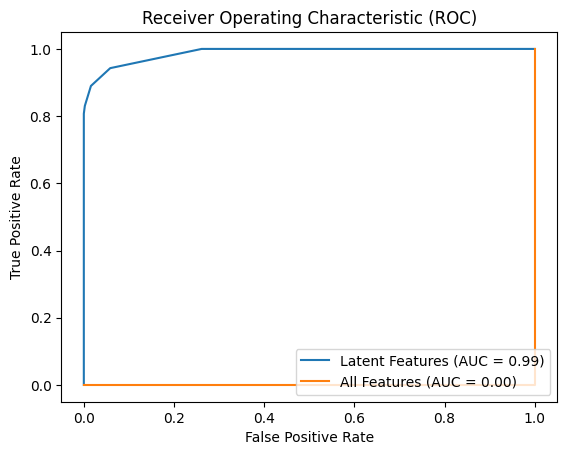

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize and fit KNN classifier for latent features
knn_latent = KNeighborsClassifier()
knn_latent.fit(encoded_images_flattened, test_labels)

# Calculate predicted probabilities for latent features
latent_probabilities = knn_latent.predict_proba(encoded_images_flattened)[:, 1]
latent_fpr, latent_tpr, _ = roc_curve(test_labels, latent_probabilities)
latent_auc = roc_auc_score(test_labels, latent_probabilities)

# Calculate predicted probabilities for all features
all_probabilities = knn_all.predict_proba(mnist_x_testMLP)[0][:, 1]
all_fpr, all_tpr, _ = roc_curve(test_labels, all_probabilities)
all_auc = roc_auc_score(test_labels, all_probabilities)

# Plot ROC curves
plt.plot(latent_fpr, latent_tpr, label='Latent Features (AUC = {:.2f})'.format(latent_auc))
plt.plot(all_fpr, all_tpr, label='All Features (AUC = {:.2f})'.format(all_auc))

# Set plot properties
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


8. Определите на первоначальной тестовой выборке изображение, имеющее наибольшую ошибку реконструкции. Выведите для этого изображения первоначальное и реконструированное изображения. 

In [48]:
def create_autoencoders(feature_layer_dim = 16):
    input_img = Input(shape = (n*n,), name = 'Input_Layer')
    # Слой encoded имеет размерность, равную feature_layer_dim 
    # и содержит закодированные входные данные 
    encoded = Dense(feature_layer_dim, activation = 'relu', 
                    name = 'Encoded_Features')(input_img)
    decoded = Dense(n*n, activation = 'sigmoid', 
                    name = 'Decoded_Input')(encoded)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    encoded_input = Input(shape = (feature_layer_dim,))
    decoder = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder(encoded_input))

    return autoencoder, encoder, decoder

autoencoder64, encoder64, decoder64 = create_autoencoders(64)
keras.utils.plot_model(autoencoder64, show_shapes = True)
autoencoder64.compile(optimizer = 'adam', loss = 'binary_crossentropy')
history = autoencoder64.fit(mnist_x_trainMLP, mnist_x_trainMLP,
                          epochs = 30,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (mnist_x_testMLP, mnist_x_testMLP),
                          verbose = 1)

Epoch 1/30
4/4 [==============================] - 3s 490ms/step - loss: 0.6527 - val_loss: 0.4152
Epoch 2/30
4/4 [==============================] - 1s 210ms/step - loss: 0.3241 - val_loss: 0.2429
Epoch 3/30
4/4 [==============================] - 1s 210ms/step - loss: 0.2325 - val_loss: 0.2269
Epoch 4/30
4/4 [==============================] - 0s 137ms/step - loss: 0.2215 - val_loss: 0.2229
Epoch 5/30
4/4 [==============================] - 0s 133ms/step - loss: 0.2178 - val_loss: 0.2202
Epoch 6/30
4/4 [==============================] - 1s 147ms/step - loss: 0.2141 - val_loss: 0.2160
Epoch 7/30
4/4 [==============================] - 0s 136ms/step - loss: 0.2107 - val_loss: 0.2126
Epoch 8/30
4/4 [==============================] - 1s 177ms/step - loss: 0.2079 - val_loss: 0.2103
Epoch 9/30
4/4 [==============================] - 0s 139ms/step - loss: 0.2059 - val_loss: 0.2082
Epoch 10/30
4/4 [==============================] - 1s 166ms/step - loss: 0.2044 - val_loss: 0.2070
Epoch 11/30
4/4 [==

In [49]:
encoded_imgs = encoder64.predict(mnist_x_testMLP)
decoded_imgs = decoder64.predict(encoded_imgs)

29/29 [==============================] - 0s 1ms/step


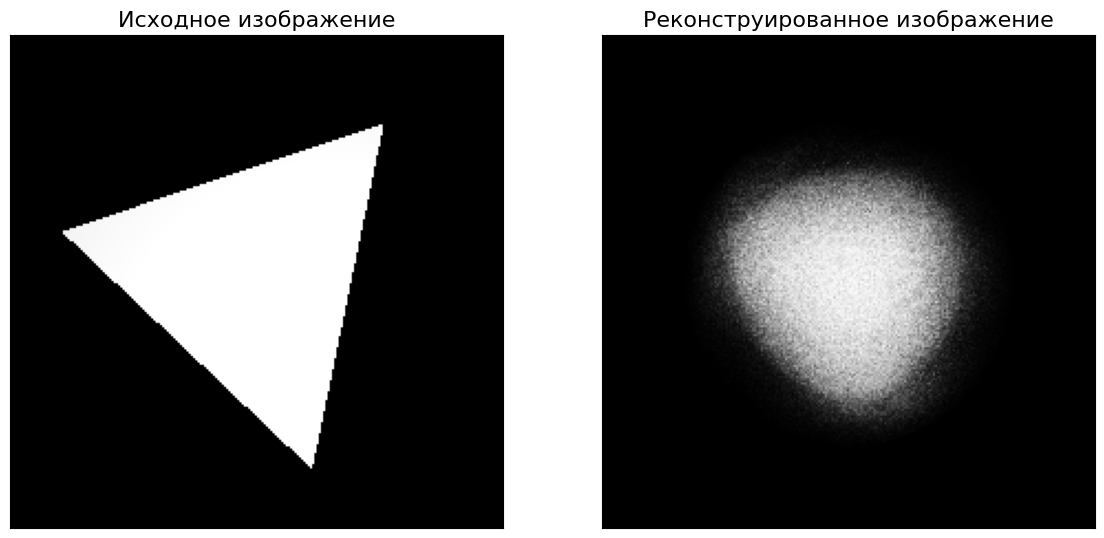

In [52]:
RE = ((mnist_x_testMLP - decoded_imgs)**2).mean(axis = 1)
RE_original = RE.copy()
biggest_re_pos = np.argmax(RE_original)
fig = plt.figure(figsize = (14, 7))
def mnist_show(img):
    plt.gray()
    plt.tick_params(axis = 'x', which = 'both', bottom = False, 
                    top = False, labelbottom = False) 
    plt.tick_params(axis = 'y', which = 'both', left = False, 
                    right = False, labelleft = False)

    plt.imshow(img.reshape(n, n))   

ax = fig.add_subplot(1, 2, 1)
plt.title('Исходное изображение', fontsize = 16)
mnist_show(mnist_x_testMLP[biggest_re_pos])

ax = fig.add_subplot(1, 2, 2)
plt.title('Реконструированное изображение', fontsize = 16)
mnist_show(decoded_imgs[biggest_re_pos]);